# <center> ACCELEROMETER AND GYROSCOPE<center> PREDICTION OF BEHAVIOR
***
# Table of Contents
* [READING THE DATASET INTO PYTHON](#READING-THE-DATASET-INTO-PYTHON)
* [DATA EDITING](#DATA-EDITING)
    * [Creating dummy variables (One-Hot Encode)](#Creating-dummy-variables-(One-Hot-Encode))
    * [Creating training and testing datasets](#Creating-training-and-testing-datasets)
***

## LOOK AT THE BIG PICTURE

In [1]:
# The problem consist in predict bovine behavior from accelerometer and gyroscope sensors data

## IMPORTS

In [2]:
import wandb

wandb.init(project="accelerometer_behavior_project")

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
#warnings.filterwarnings('ignore')

## FUNCTIONS

In [134]:
def bar_plot_classes(target):
    target = pd.Series(target)

    behavior_counts = target.value_counts(normalize=True)*100

    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=behavior_counts.keys(), y=behavior_counts.values)
    for i in ax.containers:
        ax.bar_label(i,)
    plt.ylabel('Amount (%)')
    plt.show()

## READING THE DATASET INTO PYTHON

In [75]:
df = pd.read_csv('novosDadosComComportamentos.csv')

## EXPLORATORY ANALYSIS

In [38]:
df.head()

,Date,ax,ay,az,gx,gy,gz,axc,ayc,azc,Comportamento
0,2022-11-20 08:55:44,11588,-5316,14517,5200,947,790,0.707275,-0.324463,0.886047,Ruminação
1,2022-11-20 08:55:46,8252,-7593,10239,65,-2168,-714,0.503662,-0.463440,0.624939,Ruminação
2,2022-11-20 08:55:47,3799,-3755,14927,-630,1433,365,0.231873,-0.229187,0.911072,Ruminação
3,2022-11-20 08:55:48,7439,-7147,11812,-2801,-3232,-1113,0.454041,-0.436218,0.720947,Ruminação
4,2022-11-20 08:55:49,6072,-10617,10289,4611,3331,1286,0.370605,-0.648010,0.627991,Ruminação


In [39]:
df.dropna(inplace=True)

In [40]:
df.describe()

,ax,ay,az,gx,gy,gz,axc,ayc,azc
count,28486.000000,28486.000000,28486.000000,28486.000000,28486.000000,28486.000000,28486.000000,28486.000000,28486.000000
mean,7028.882012,-2035.691708,6486.126659,303.476936,-176.317244,123.350067,0.429009,-0.124249,0.395882
std,8193.792383,7878.450777,6500.230632,4690.453566,3706.590749,4094.165288,0.500109,0.480862,0.396743
min,-32450.000000,-31768.000000,-32733.000000,-32768.000000,-32768.000000,-32768.000000,-1.980591,-1.938965,-1.997864
25%,3799.000000,-8802.000000,1573.000000,-864.000000,-1126.000000,-691.750000,0.231873,-0.537231,0.096008
50%,9739.000000,-2726.000000,6689.000000,239.000000,-180.000000,133.000000,0.594421,-0.166382,0.408264
75%,12682.000000,4157.000000,11945.000000,1380.000000,754.750000,957.750000,0.774048,0.253723,0.729065
max,30658.000000,32334.000000,32756.000000,32767.000000,32767.000000,32767.000000,1.871216,1.973511,1.999268


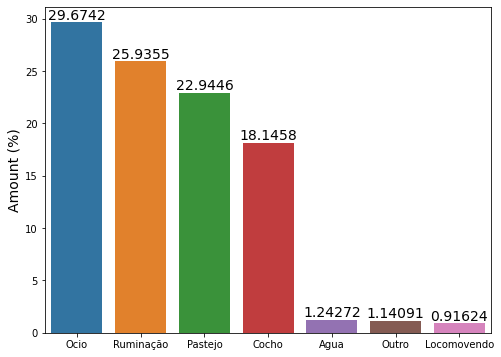

In [135]:
bar_plot_classes(df.Comportamento)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28486 entries, 0 to 28485
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           28486 non-null  object 
 1   ax             28486 non-null  int64  
 2   ay             28486 non-null  int64  
 3   az             28486 non-null  int64  
 4   gx             28486 non-null  int64  
 5   gy             28486 non-null  int64  
 6   gz             28486 non-null  int64  
 7   axc            28486 non-null  float64
 8   ayc            28486 non-null  float64
 9   azc            28486 non-null  float64
 10  Comportamento  28486 non-null  object 
dtypes: float64(3), int64(6), object(2)
memory usage: 2.6+ MB


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Comportamentos = le.fit_transform(df['Comportamento'])

In [35]:
df['Comportamento'] = Comportamentos

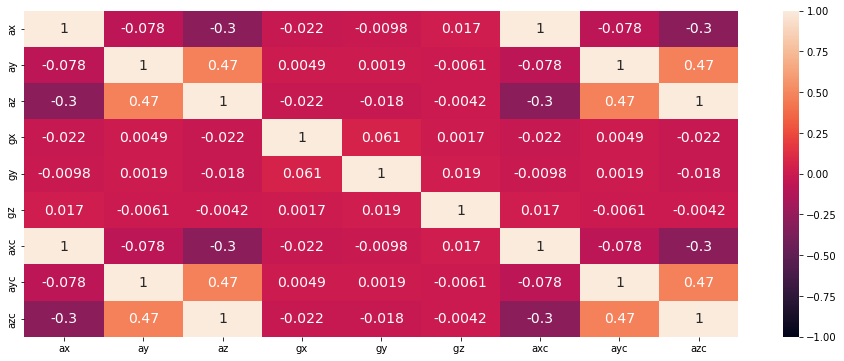

In [74]:
plt.figure(figsize=(16, 6))
sns.heatmap( df.corr(), annot=True, vmin=-1, vmax=1)

plt.show()

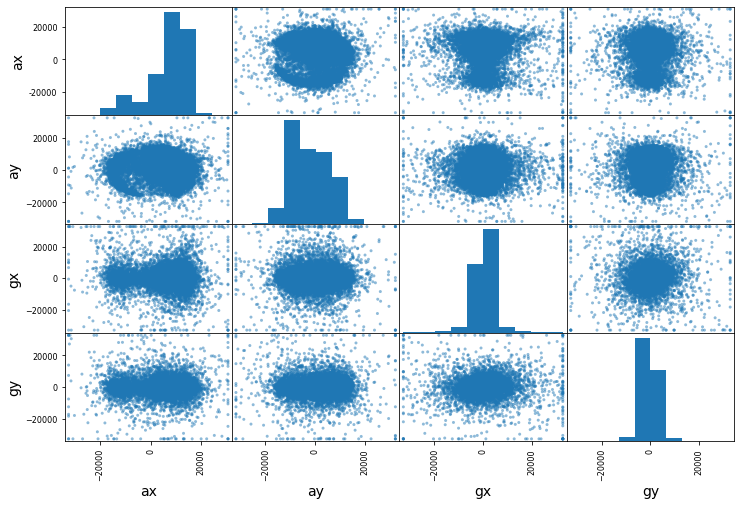

In [24]:
from pandas.plotting import scatter_matrix

attributes = ["ax", "ay", "gx", "gy"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

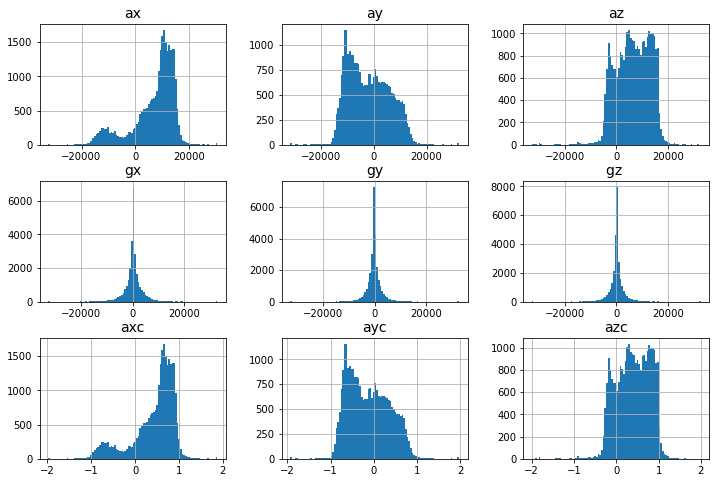

wandb: Network error (ConnectionError), entering retry loop.
wandb: Network error (ConnectionError), entering retry loop.


In [20]:
# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
df.hist(bins=100, figsize=(12, 8))
plt.show()

## DATA DIVISION

In [69]:
y = df.Comportamento

In [70]:
x = df.drop(['Comportamento', 'Date'], axis=1)

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.7, shuffle=True, random_state=0)

In [72]:
# Feature Scaling
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [55]:
y_train.value_counts(normalize=True)*100

Ocio           29.128145
Ruminação      26.483324
Pastejo        22.516091
Cocho          18.256290
Agua            1.451141
Outro           1.217086
Locomovendo     0.947923
Name: Comportamento, dtype: float64

In [56]:
y_test.value_counts(normalize=True)*100

Ocio           29.908229
Ruminação      25.700817
Pastejo        23.128228
Cocho          18.098390
Agua            1.153403
Outro           1.108269
Locomovendo     0.902663
Name: Comportamento, dtype: float64

## MODEL SELECTION

In [104]:
from sklearn.model_selection import cross_val_score

In [107]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0, n_jobs=-1)
rf_scores = cross_val_score(rf_model, X_train, y_train,
                            scoring="accuracy", cv=10, n_jobs=-1)

In [116]:
display_scores(rf_scores*100)

Scores: [62.69005848 62.22222222 63.97660819 62.45614035 60.23391813 65.22248244
 64.16861827 62.17798595 63.58313817 63.58313817]
Mean: 63.03143103660791
Standard deviation: 1.3134984923812125


In [136]:
# Houldout
preds = rf_model.fit(X_train, y_train).predict(X_test)
probas = rf_model.predict_proba(X_test)

from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, preds))
print(accuracy_score(y_test, preds)*100)

              precision    recall  f1-score   support

        Agua       0.39      0.11      0.18       230
       Cocho       0.46      0.43      0.44      3609
 Locomovendo       0.09      0.01      0.01       180
        Ocio       0.73      0.69      0.71      5964
       Outro       0.30      0.05      0.09       221
     Pastejo       0.53      0.62      0.57      4612
   Ruminação       0.75      0.80      0.77      5125

    accuracy                           0.63     19941
   macro avg       0.46      0.39      0.40     19941
weighted avg       0.63      0.63      0.63     19941

63.3970212125771


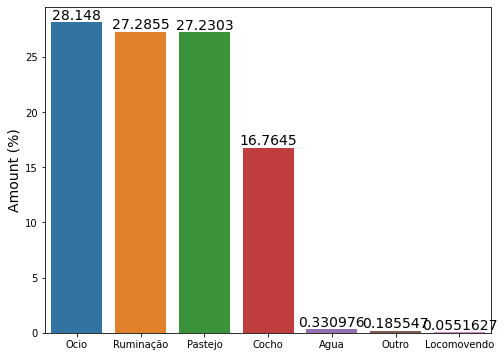

In [137]:
bar_plot_classes(preds)

### KNN

In [118]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_jobs=-1)
knn_scores = cross_val_score(knn_model, X_train, y_train,
                            scoring="accuracy", cv=10, n_jobs=-1)

In [119]:
display_scores(knn_scores*100)

Scores: [60.23391813 60.11695906 61.98830409 57.77777778 59.88304094 60.88992974
 60.53864169 58.66510539 60.6557377  60.07025761]
Mean: 60.08196721311475
Standard deviation: 1.1047848922297208


In [138]:
# Houldout
preds = knn_model.fit(X_train, y_train).predict(X_test)
probas = knn_model.predict_proba(X_test)

from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, preds))
print(accuracy_score(y_test, preds)*100)

              precision    recall  f1-score   support

        Agua       0.21      0.24      0.22       230
       Cocho       0.42      0.50      0.45      3609
 Locomovendo       0.07      0.01      0.02       180
        Ocio       0.65      0.73      0.69      5964
       Outro       0.25      0.12      0.16       221
     Pastejo       0.55      0.45      0.49      4612
   Ruminação       0.78      0.72      0.75      5125

    accuracy                           0.60     19941
   macro avg       0.42      0.40      0.40     19941
weighted avg       0.60      0.60      0.60     19941

60.29286394864851


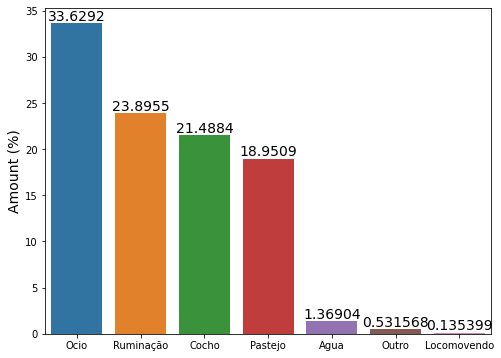

In [139]:
bar_plot_classes(preds)

##  Hyperparameters search

### RF

In [ ]:
wandb.sklearn.plot_classifier(rf_model, X_train, X_test, y_train, y_test, preds, probas, labels=y_test.value_counts().keys().to_list(), model_name="Random Forest", feature_names=None)

In [81]:
from sklearn.model_selection import cross_val_score

In [92]:
def tune_rf(params):
    from sklearn.model_selection import cross_val_score
    bootstrap = params[0]
    max_depth = params[1]
    min_samples_leaf = params[2]
    min_samples_split = params[3]
    n_estimators = params[4]
    
    print(params, '\n')
    
    rf_model = RandomForestClassifier(bootstrap=bootstrap, max_depth=max_depth, min_samples_leaf=min_samples_leaf,
                                     min_samples_split=min_samples_split,n_estimators=n_estimators, random_state=0, n_jobs=-1)
    

    r2 = cross_val_score(rf_model, X_train, y_train, cv=5)
    
    return -r2.mean()

space = [
    [True, False], #bootstrap
    [10, 20, 30, None], #max_depth
    [1, 2, 4], # min_samples_leaf
    [2, 5, 10], # min_samples_split
    [5, 10, 20, 50, 100, 200, 300]] # n_estimators

In [93]:
%%time
from skopt import gp_minimize
rf_best_params = gp_minimize(tune_rf, space, random_state=0, verbose=True, n_calls=100, n_random_starts=20, n_jobs=-1)

Iteration No: 1 started. Evaluating function at random point.
[True, None, 4, 10, 100] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 2.2405
Function value obtained: -0.6362
Current minimum: -0.6362
Iteration No: 2 started. Evaluating function at random point.
[False, 20, 1, 5, 50] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 1.2545
Function value obtained: -0.6209
Current minimum: -0.6362
Iteration No: 3 started. Evaluating function at random point.
[True, 20, 2, 10, 20] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.4533
Function value obtained: -0.6303
Current minimum: -0.6362
Iteration No: 4 started. Evaluating function at random point.
[True, 20, 4, 2, 200] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 2.8160
Function value obtained: -0.6332
Current minimum: -0.6362
Iteration No: 5 started. Evaluating function at random point.
[False, 30, 2, 5, 100] 

Iteration No: 5 ended. Evaluation 

/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 1.7059
Function value obtained: -0.6352
Current minimum: -0.6362
Iteration No: 44 started. Searching for the next optimal point.
[True, None, 4, 2, 100] 

Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 2.2601
Function value obtained: -0.6335
Current minimum: -0.6362
Iteration No: 45 started. Searching for the next optimal point.
[False, None, 4, 5, 300] 

Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 6.9794
Function value obtained: -0.6308
Current minimum: -0.6362
Iteration No: 46 started. Searching for the next optimal point.
[True, 20, 4, 2, 300] 

Iteration No: 46 ended. Search finished for the next optimal point.
Time taken: 4.8575
Function value obtained: -0.6332
Current minimum: -0.6362
Iteration No: 47 started. Searching for the next optimal point.
[True, 10, 2, 10, 50] 

Iteration No: 47 ended. Search finished for the next optimal po

/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 51 ended. Search finished for the next optimal point.
Time taken: 2.1831
Function value obtained: -0.6348
Current minimum: -0.6363
Iteration No: 52 started. Searching for the next optimal point.
[True, None, 2, 10, 10] 

Iteration No: 52 ended. Search finished for the next optimal point.
Time taken: 0.9613
Function value obtained: -0.6151
Current minimum: -0.6363
Iteration No: 53 started. Searching for the next optimal point.
[False, 20, 4, 10, 5] 

Iteration No: 53 ended. Search finished for the next optimal point.
Time taken: 0.9381
Function value obtained: -0.6104
Current minimum: -0.6363
Iteration No: 54 started. Searching for the next optimal point.
[False, 20, 4, 10, 300] 

Iteration No: 54 ended. Search finished for the next optimal point.
Time taken: 6.6546
Function value obtained: -0.6329
Current minimum: -0.6363
Iteration No: 55 started. Searching for the next optimal point.
[True, None, 2, 2, 50] 

Iteration No: 55 ended. Search finished for the next optimal po

/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 71 ended. Search finished for the next optimal point.
Time taken: 2.2439
Function value obtained: -0.6363
Current minimum: -0.6363
Iteration No: 72 started. Searching for the next optimal point.
[False, 30, 2, 5, 50] 

Iteration No: 72 ended. Search finished for the next optimal point.
Time taken: 2.0964
Function value obtained: -0.6212
Current minimum: -0.6363
Iteration No: 73 started. Searching for the next optimal point.
[True, 30, 4, 10, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 73 ended. Search finished for the next optimal point.
Time taken: 2.3266
Function value obtained: -0.6363
Current minimum: -0.6363
Iteration No: 74 started. Searching for the next optimal point.
[False, 20, 4, 2, 100] 

Iteration No: 74 ended. Search finished for the next optimal point.
Time taken: 2.9707
Function value obtained: -0.6309
Current minimum: -0.6363
Iteration No: 75 started. Searching for the next optimal point.
[True, 30, 4, 10, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 75 ended. Search finished for the next optimal point.
Time taken: 2.3248
Function value obtained: -0.6363
Current minimum: -0.6363
Iteration No: 76 started. Searching for the next optimal point.
[False, 10, 4, 10, 10] 

Iteration No: 76 ended. Search finished for the next optimal point.
Time taken: 1.1521
Function value obtained: -0.6129
Current minimum: -0.6363
Iteration No: 77 started. Searching for the next optimal point.
[True, 30, 4, 10, 20] 

Iteration No: 77 ended. Search finished for the next optimal point.
Time taken: 1.2445
Function value obtained: -0.6277
Current minimum: -0.6363
Iteration No: 78 started. Searching for the next optimal point.
[True, 30, 4, 10, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 78 ended. Search finished for the next optimal point.
Time taken: 2.3336
Function value obtained: -0.6363
Current minimum: -0.6363
Iteration No: 79 started. Searching for the next optimal point.
[False, None, 2, 2, 5] 

Iteration No: 79 ended. Search finished for the next optimal point.
Time taken: 1.0987
Function value obtained: -0.5972
Current minimum: -0.6363
Iteration No: 80 started. Searching for the next optimal point.
[True, 30, 4, 10, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 80 ended. Search finished for the next optimal point.
Time taken: 2.3718
Function value obtained: -0.6363
Current minimum: -0.6363
Iteration No: 81 started. Searching for the next optimal point.
[True, None, 4, 5, 10] 

Iteration No: 81 ended. Search finished for the next optimal point.
Time taken: 1.1369
Function value obtained: -0.6213
Current minimum: -0.6363
Iteration No: 82 started. Searching for the next optimal point.
[False, 10, 2, 2, 300] 

Iteration No: 82 ended. Search finished for the next optimal point.
Time taken: 5.8981
Function value obtained: -0.6226
Current minimum: -0.6363
Iteration No: 83 started. Searching for the next optimal point.
[True, 30, 2, 10, 200] 

Iteration No: 83 ended. Search finished for the next optimal point.
Time taken: 3.7932
Function value obtained: -0.6338
Current minimum: -0.6363
Iteration No: 84 started. Searching for the next optimal point.
[True, None, 2, 10, 300] 

Iteration No: 84 ended. Search finished for the next optimal p

/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 86 ended. Search finished for the next optimal point.
Time taken: 2.4288
Function value obtained: -0.6363
Current minimum: -0.6363
Iteration No: 87 started. Searching for the next optimal point.
[True, 30, 4, 10, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 87 ended. Search finished for the next optimal point.
Time taken: 2.4295
Function value obtained: -0.6363
Current minimum: -0.6363
Iteration No: 88 started. Searching for the next optimal point.
[True, 30, 4, 10, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 88 ended. Search finished for the next optimal point.
Time taken: 2.4267
Function value obtained: -0.6363
Current minimum: -0.6363
Iteration No: 89 started. Searching for the next optimal point.
[True, None, 2, 10, 100] 

Iteration No: 89 ended. Search finished for the next optimal point.
Time taken: 2.4918
Function value obtained: -0.6325
Current minimum: -0.6363
Iteration No: 90 started. Searching for the next optimal point.
[False, 20, 1, 5, 100] 

Iteration No: 90 ended. Search finished for the next optimal point.
Time taken: 3.3360
Function value obtained: -0.6199
Current minimum: -0.6363
Iteration No: 91 started. Searching for the next optimal point.
[True, 30, 4, 10, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 91 ended. Search finished for the next optimal point.
Time taken: 2.9096
Function value obtained: -0.6363
Current minimum: -0.6363
Iteration No: 92 started. Searching for the next optimal point.
[True, 20, 1, 2, 50] 

Iteration No: 92 ended. Search finished for the next optimal point.
Time taken: 2.0239
Function value obtained: -0.6272
Current minimum: -0.6363
Iteration No: 93 started. Searching for the next optimal point.
[True, 30, 1, 5, 300] 

Iteration No: 93 ended. Search finished for the next optimal point.
Time taken: 5.6701
Function value obtained: -0.6344
Current minimum: -0.6363
Iteration No: 94 started. Searching for the next optimal point.
[True, 30, 4, 10, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 94 ended. Search finished for the next optimal point.
Time taken: 2.5996
Function value obtained: -0.6363
Current minimum: -0.6363
Iteration No: 95 started. Searching for the next optimal point.
[True, 30, 2, 2, 20] 

Iteration No: 95 ended. Search finished for the next optimal point.
Time taken: 1.5109
Function value obtained: -0.6208
Current minimum: -0.6363
Iteration No: 96 started. Searching for the next optimal point.
[True, 30, 4, 2, 10] 

Iteration No: 96 ended. Search finished for the next optimal point.
Time taken: 1.3614
Function value obtained: -0.6213
Current minimum: -0.6363
Iteration No: 97 started. Searching for the next optimal point.
[True, None, 1, 5, 300] 

Iteration No: 97 ended. Search finished for the next optimal point.
Time taken: 5.6835
Function value obtained: -0.6338
Current minimum: -0.6363
Iteration No: 98 started. Searching for the next optimal point.
[True, 30, 4, 10, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 98 ended. Search finished for the next optimal point.
Time taken: 2.5780
Function value obtained: -0.6363
Current minimum: -0.6363
Iteration No: 99 started. Searching for the next optimal point.
[True, 30, 4, 10, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 99 ended. Search finished for the next optimal point.
Time taken: 2.6043
Function value obtained: -0.6363
Current minimum: -0.6363
Iteration No: 100 started. Searching for the next optimal point.
[True, 30, 4, 10, 100] 



/home/caio/anaconda3/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 100 ended. Search finished for the next optimal point.
Time taken: 2.6101
Function value obtained: -0.6363
Current minimum: -0.6363
CPU times: user 3min 8s, sys: 3min 18s, total: 6min 27s
Wall time: 4min 42s


In [94]:
rf_best_params.x

[True, 30, 4, 10, 100]